In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import math

import statsmodels.stats.power as smp
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
data = pd.read_csv('hw3.csv', sep=';', index_col=0)
data.head()

,date,p_value,lift,users
1,2020-02-01,"0,40515","0,214387464387464",731
2,2020-02-02,"0,3188","0,183619550858653",1461
3,2020-02-03,"0,55553","0,0829441350817317",2285
4,2020-02-04,"0,52978","0,075370018975332",3068
5,2020-02-05,"0,93192","0,0129445366920968",3909


## Задача 1
Проанализируйте эксперимент, ориентируясь на p-value: что можно сказать по его поведению? Стоит ли останавливать эксперимент?

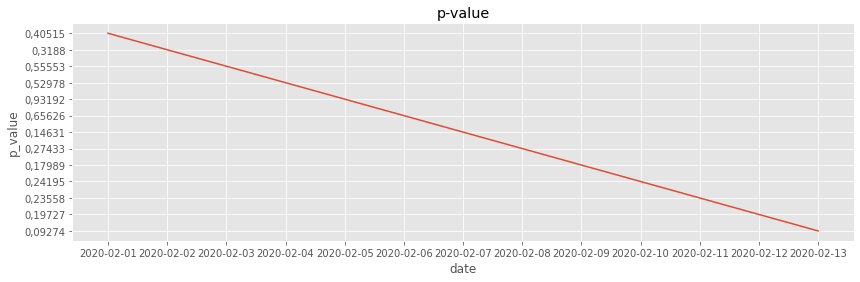

In [10]:
plt.figure(figsize=(14,4))
sns.lineplot(
    data=data,
    x='date',
    y='p_value'
).set(title='p-value');

### Вывод
Динамика p-value имеет постоянный тренд на снижение, с каждым днем вероятность ошибки первого рода сокращается.<br>
Соответственно, можно сделать вывод о том, что эксперимент еще стоит продолжать, поскольку не набрана достаточная аудитория для получения точных результатов. Однако стоит дополнительно рассчитать требуемый объем аудитории для данного теста, чтобы понимать, когда именно его важно останавливать.

## Задача 2
Посчитайте время, которое требуется на эксперимент с учетом вводных

In [40]:
nobs = smp.zt_ind_solve_power(
    alpha=.05,
    power=.8,
    effect_size=.05
)
print(f'Nobs.: {nobs:.4f}')

Nobs.: 6279.0884


<b>Расчет в калькуляторе показал:<b>
- 14000 пользователей на эксперимент или 7000 пользователя на вариант

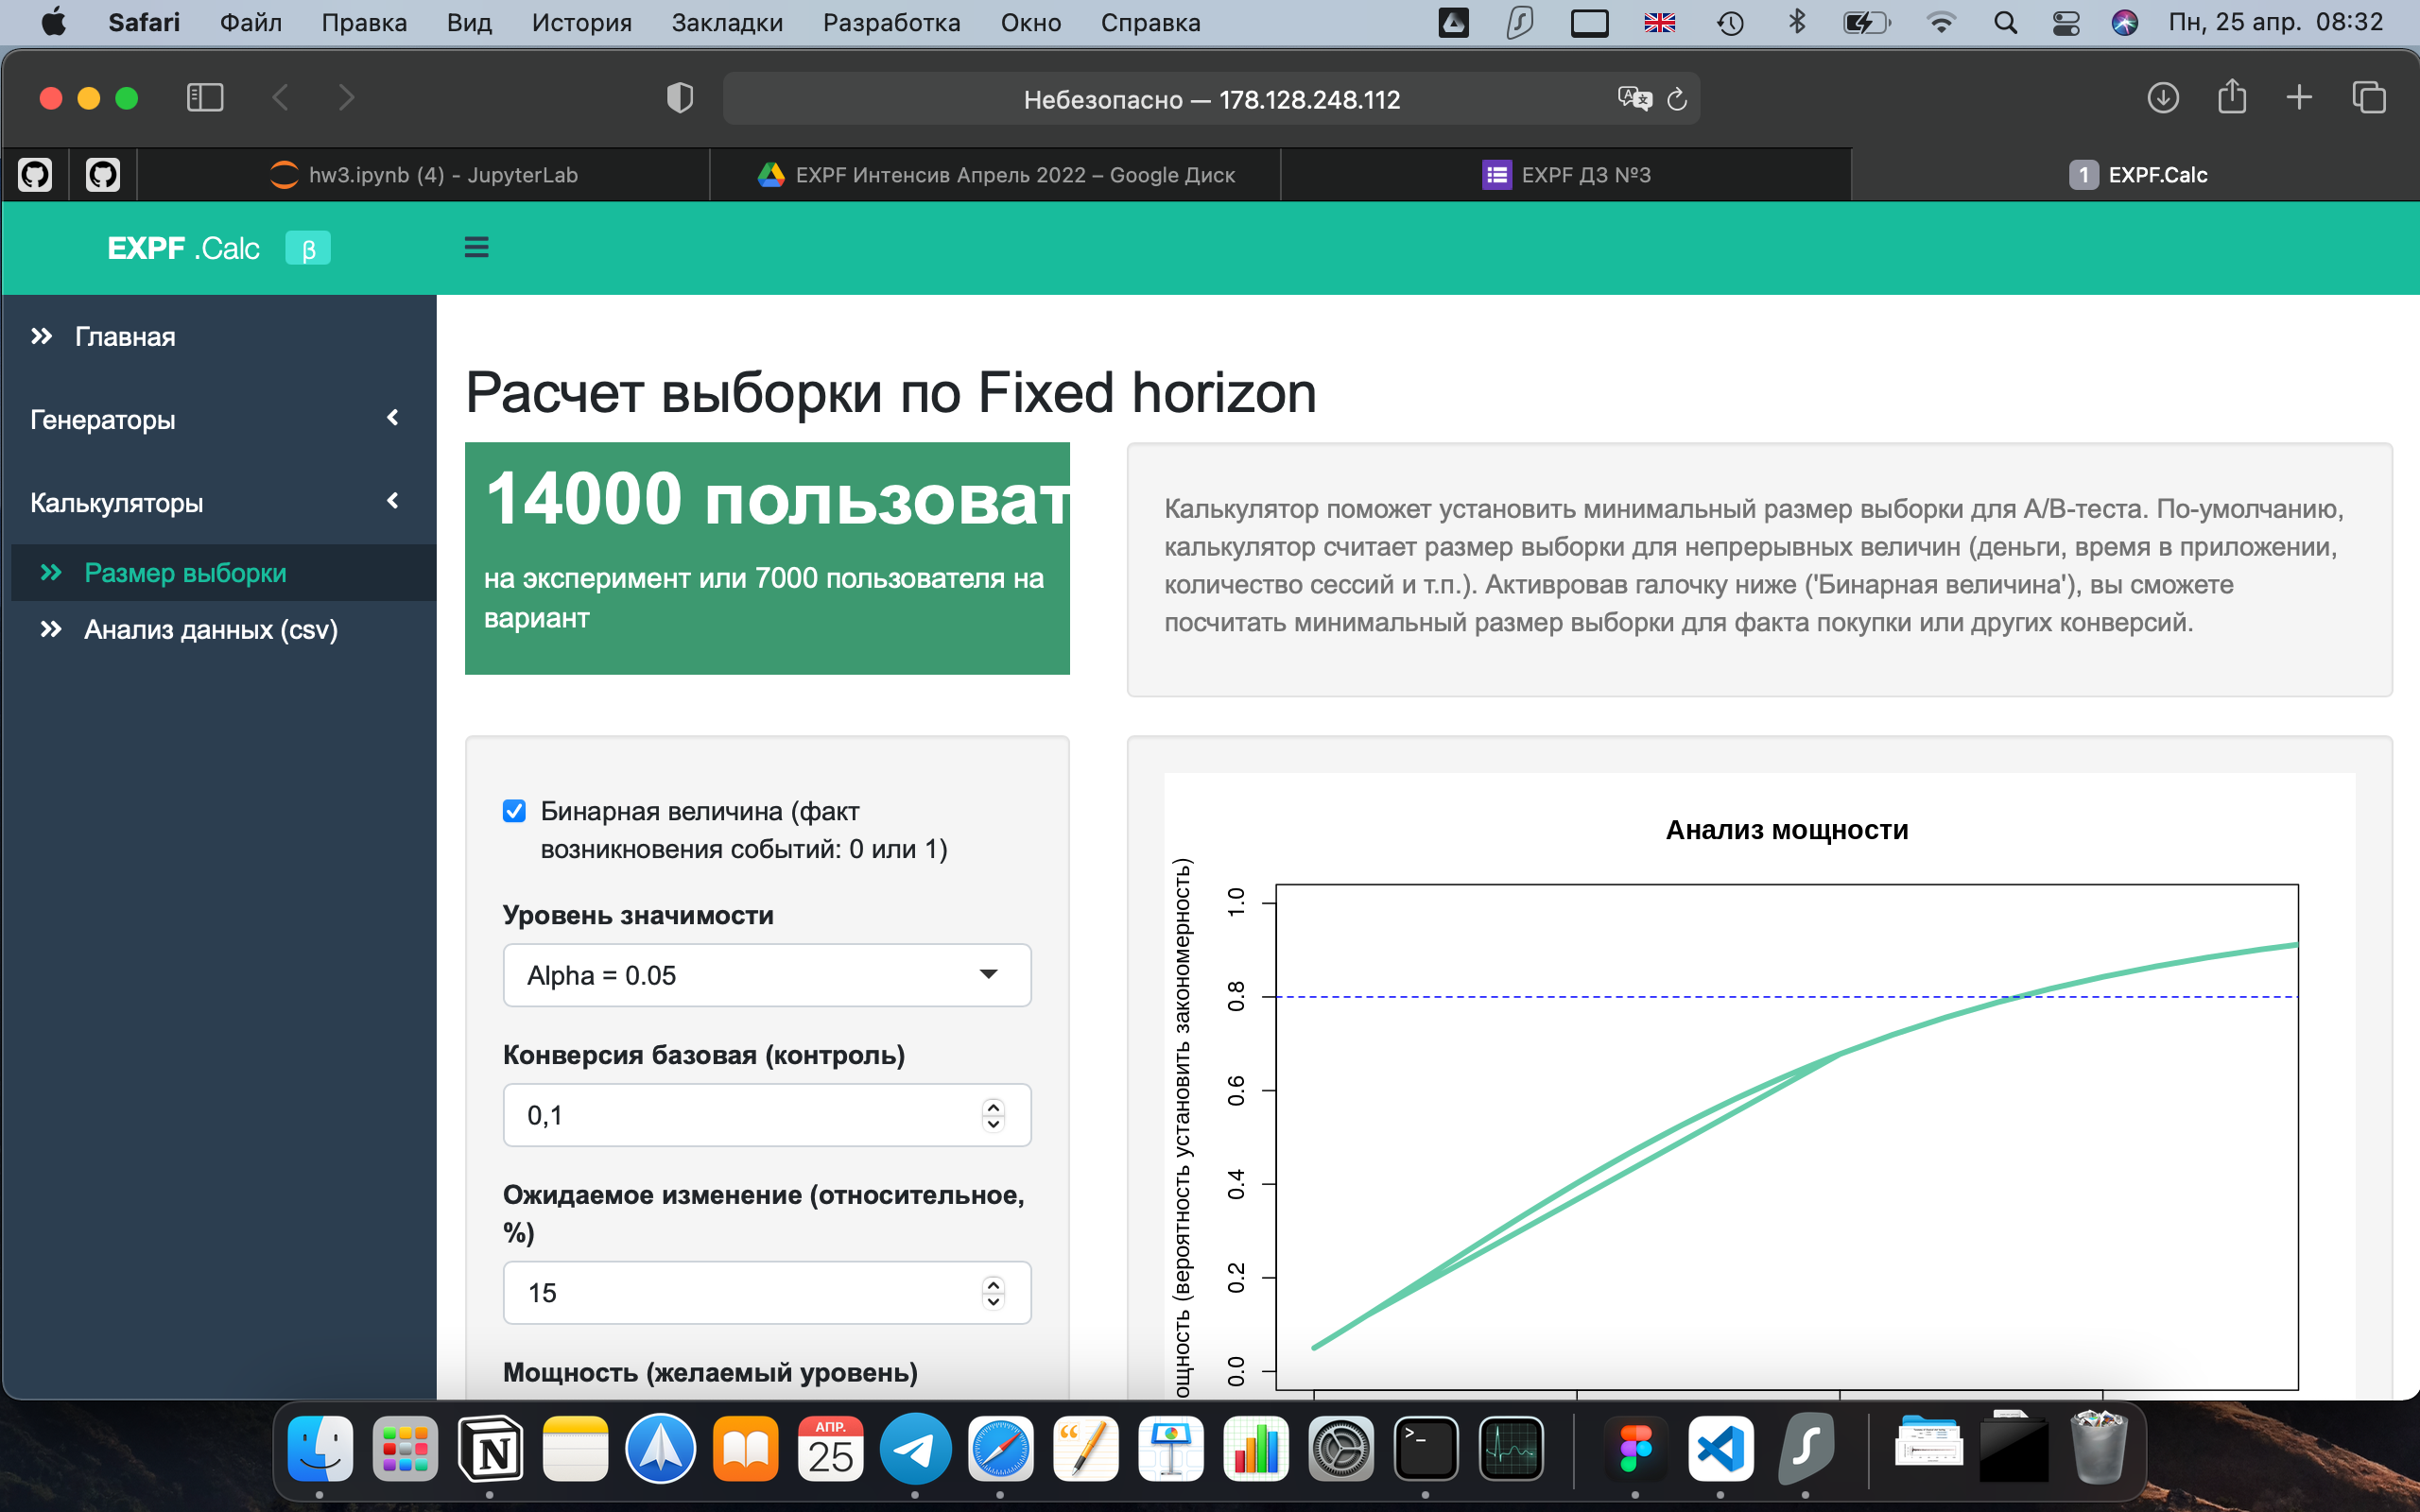

In [43]:
from PIL import Image
img = Image.open(r'hw3_pic.png')
img

### Вывод
На основе проведеных проверок можно сделать вывод, что эксперимент пока что не набрал достаточную аудиторию для теста. P-Value имеет постоянную динамику на снижение. И можно предположить, что по достижении треубемой аудитории уровень P-Value будет зафиксирован и после этого можно будет делать выводы. Поэтому стоит продлить тест.